In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os

import warnings
warnings.filterwarnings('ignore')

In [64]:
import numpy as np

In [ ]:
pd.read_parquet('Data/train_all_slopes.parquet').shape

In [115]:
(80386+79638+79850+79557+80001)/5

79886.4

In [112]:
fold = 4
path = 'models_DART_corr_pcaslope_lag/'
for fname in os.listdir(path):
            if fname.startswith("fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                model.save_model(path + 'cp_{}_model.txt'.format(fold))

fold_4_iter_11004_score_0.79992.pkl


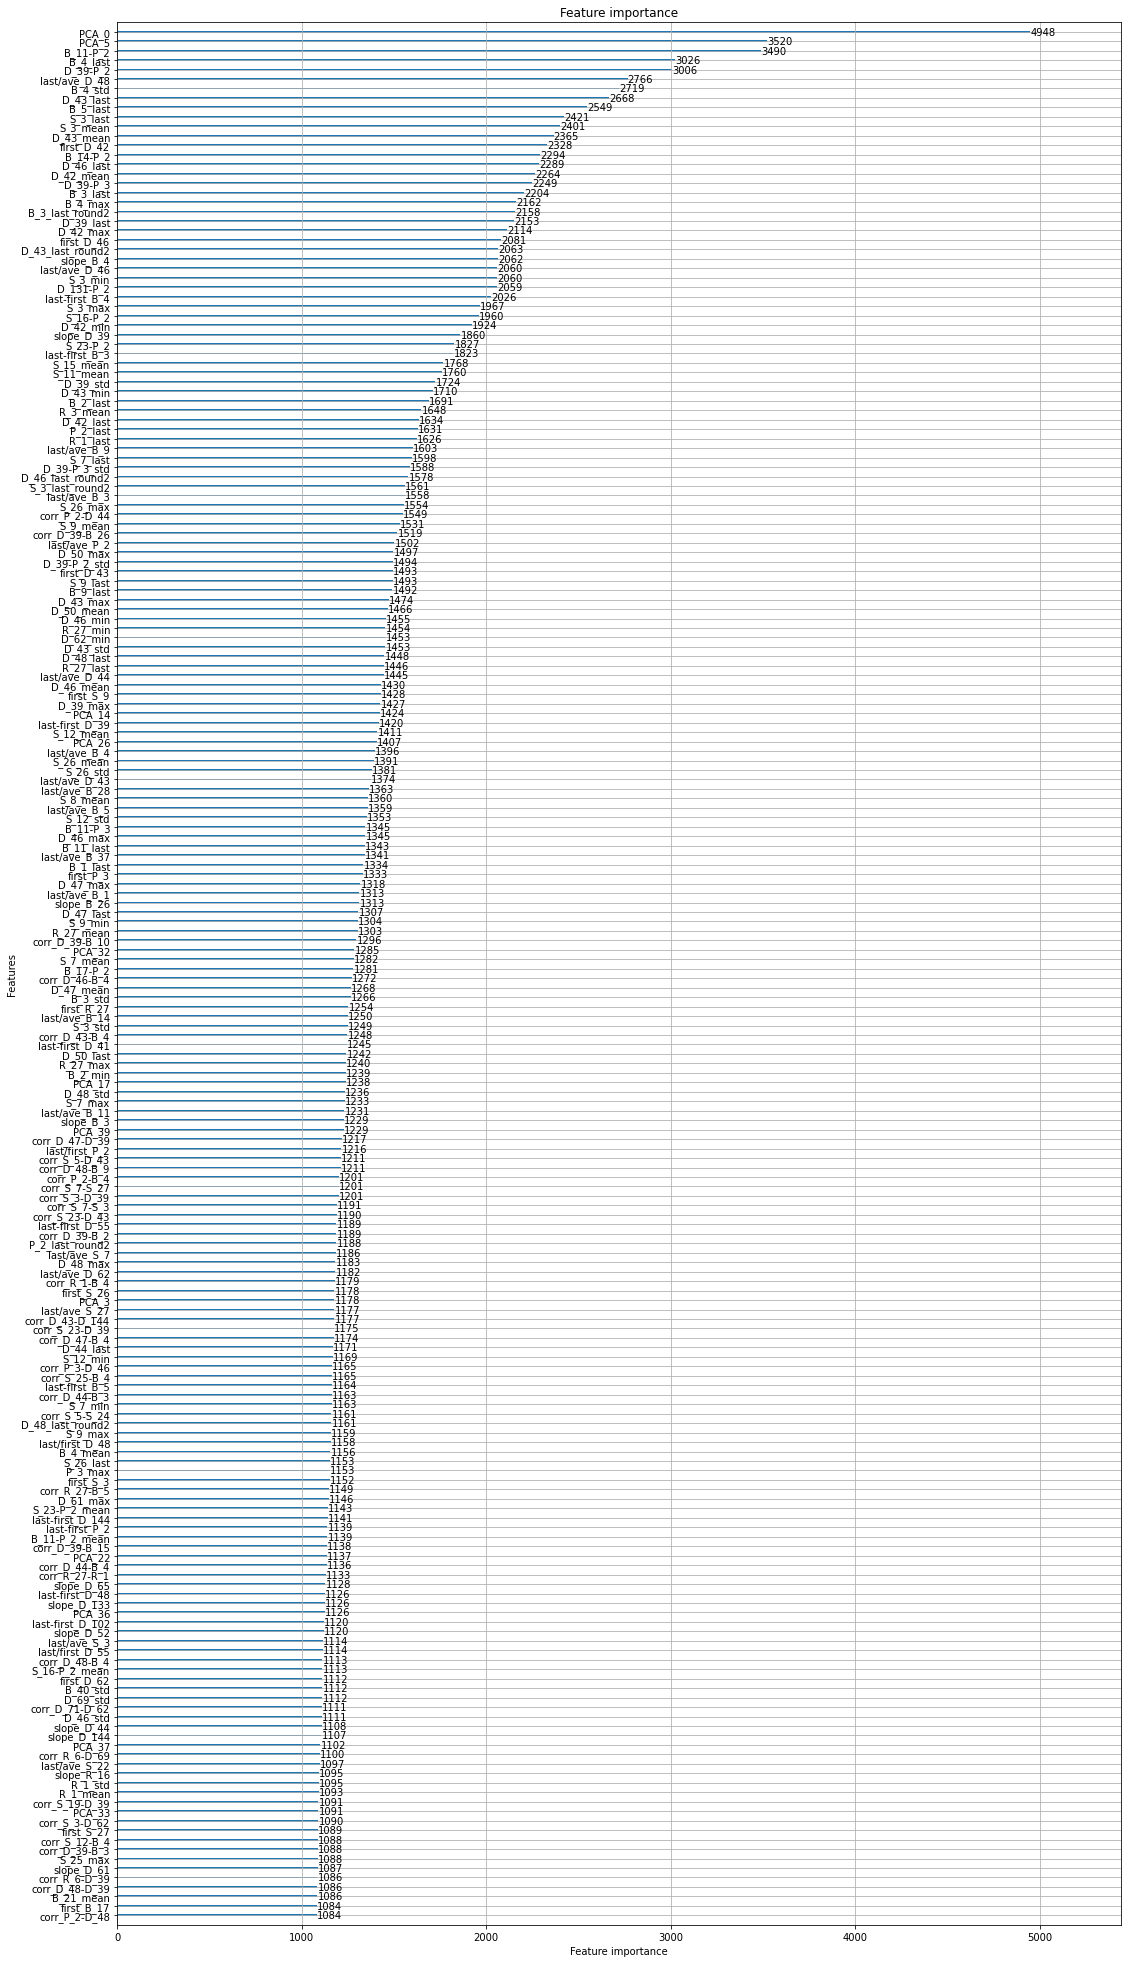

In [80]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [81]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [82]:
df.head(50)

,index,importance
0,PCA_0,4948
1,PCA_5,3520
2,B_11-P_2,3490
3,B_4_last,3026
4,D_39-P_2,3006
5,last/ave_D_48,2766
6,B_4_std,2719
7,D_43_last,2668
8,B_5_last,2549
9,S_3_last,2421


In [83]:
df[df.importance == 0]

,index,importance
1893,R_5_min,0
1894,first_R_25,0
1895,first_R_13,0
1896,R_2_min,0
1897,first_D_111,0
...,...,...
2033,last/ave_D_94,0
2034,last/ave_R_25,0
2035,D_96_min,0
2036,D_103_last,0


In [84]:
df[df['index'].str.startswith('lag_')]


,index,importance


In [85]:
df[df['index'].str.startswith('slope_')]

,index,importance
24,slope_B_4,2062
32,slope_D_39,1860
92,slope_B_26,1313
116,slope_B_3,1229
164,slope_D_65,1128
...,...,...
1995,slope_D_93,0
1996,slope_R_23,0
1997,slope_D_88,0
1999,slope_R_18,0


In [86]:
df[df['index'].str.startswith('PCA_')]

,index,importance
0,PCA_0,4948
1,PCA_5,3520
72,PCA_14,1424
75,PCA_26,1407
97,PCA_32,1285
111,PCA_17,1238
115,PCA_39,1229
133,PCA_3,1178
161,PCA_22,1137
167,PCA_36,1126


In [87]:
df[df['index'].str.startswith('corr_')]

,index,importance
51,corr_P_2-D_44,1549
53,corr_D_39-B_26,1519
96,corr_D_39-B_10,1296
100,corr_D_46-B_4,1272
106,corr_D_43-B_4,1248
117,corr_D_47-D_39,1217
119,corr_S_5-D_43,1211
120,corr_D_48-B_9,1211
121,corr_S_3-D_39,1201
122,corr_P_2-B_4,1201


In [ ]:
score = pd.read_csv('Data/corr_importance.csv')

In [ ]:
score.sort_values(by='score_first', ascending=False, inplace=True)

In [ ]:
top_corr = score['first'].unique()[:10]
top_corr

In [ ]:
for i in range(0,10):
    print(top_corr[i], end=', ')
    score_first = score[score['first'] == top_corr[i]].sort_values(by='corr', ascending=False)
    high_corr_list = score_first[score_first['corr'] > 0.5]['name'].to_list()
    print(set(top_corr).intersection(set(high_corr_list)))

In [ ]:
len(['corr_D_39-B_26', 'corr_D_48-B_4', 'corr_P_2-D_44',
       'corr_D_47-B_4', 'corr_D_47-D_39', 'corr_P_2-B_4',
       'corr_D_39-B_10', 'corr_D_44-B_4', 'corr_D_39-B_2',
       'corr_D_46-B_4', 'corr_D_48-D_47', 'corr_D_48-B_3',
       'corr_D_48-B_9', 'corr_S_5-S_24', 'corr_S_7-S_3',
       'corr_D_43-D_144', 'corr_D_48-D_39', 'corr_D_44-B_3',
       'corr_P_3-D_46', 'corr_S_5-D_43', 'corr_R_1-B_4', 
       'corr_P_3-D_47', 'corr_D_39-B_3', 'corr_R_6-D_39', 'corr_S_27-B_2',
       'corr_S_23-D_43', 'corr_R_6-D_69', 'corr_P_2-D_48',
       'corr_S_25-B_4', 'corr_D_43-B_4', 'corr_R_27-D_69',
       'corr_S_7-S_27', 'corr_D_39-B_11', 'corr_S_3-D_39',
       'corr_D_39-B_1', 'corr_S_12-B_4', 'corr_D_39-B_15',
       'corr_R_27-B_26', 'corr_S_23-D_39', 'corr_R_27-R_1',
       'corr_R_1-D_39', 'corr_S_19-D_39', 'corr_S_27-B_3',
       'corr_S_16-D_39', 'corr_R_27-B_5',
       'corr_S_3-D_62', 'corr_D_71-D_62', 'corr_R_27-D_39'])